# Two-Layer Neural Network
**Due: Mondy, 09/26/2022, 2:15 PM**

Welcome to your third assignment. You will build your first neural network in this assignment. 

Contents:
1. (5%) Exercise 1:  Extract key properties
2. (10%) Exercise 2.1: Initialize neural network parameters
3. (20%) Exercise 2.2: Forward propagation
4. (5%) Exercise 2.3: Compute Cost
5. (30%) Exercise 2.4: Compute gradients
6. (10%) Exerise 2.5: Update parameters
7. (10%) Exercise 2.6: Train neural network
8. (5%) Exercise 2.7: Classification
9. (5%) Exercise 4: Train neural networks on new datasets

**Instructions:**
- The code between the ### START CODE HERE ### and ### END CODE HERE ### comments will be graded.
- Change variable names at your own risk. Make sure you understand what you are doing.
- Avoid using for-loops and while-loops, unless you are explicitly asked to do so.

**You will learn how to:**
- Implement a binary classification neural network with a single hidden layer.
- Parameterize neural network with numpy arrays.
- Use units with a non-linear activation function, such as tanh 

## 1 - Dataset ##

The following code will load a imaginary dataset. Features: `X` is a matrix made with 2-dimensional coordinates of datapoints on a plane. Labels: `y` is a binary-class vector.  
You can visualize the dataset by running following code block. The datapoints make a "flower" pattern with red dots (label **y=0**) and some blue (**y=1**) points. 

**Your goal is to build a model to distinguish these datapoints.** In other words, we want to build a classifier to define red regions and blue regions in this plane.

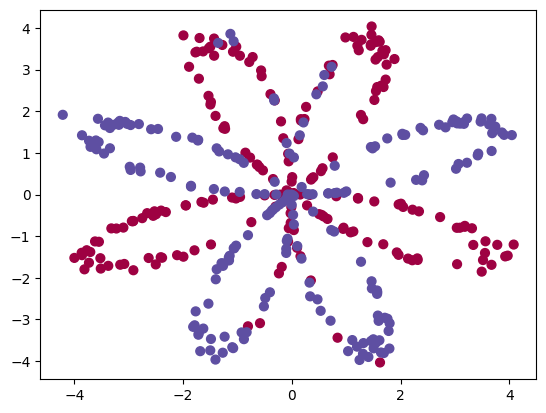

In [45]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1) # set a seed so that the results are consistent

# Load dataset
X, y = load_planar_dataset()
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);


The dataset contains:
- a matrix `X` that contains your features (x1, x2)
- a vector `y` that contains your labels (red:0 / blue:1).

As always, lets get a better sense of what our data looks like. 

**(5%) Exercise 1:  Extract key properties**

Determine data and label dimensions. Also find out number of examples and number of features.

In [46]:
### START CODE HERE ### (≈ 4 lines of code)
assert X.shape[0] == y.shape[0]
dim_X = (X.shape[0], X.shape[1])
dim_y = (y.shape[0], y.shape[1])
M = dim_X[0]  # number of training examples
N = dim_X[1]  # number of features/variables for each example
### END CODE HERE ###

print (f"The dimension of data is: {dim_X}")
print (f"The dimension of label is: {dim_y}")
print (f"This dataset has {M} examples")
print (f"Each example has {N} features")

The dimension of data is: (400, 2)
The dimension of label is: (400, 1)
This dataset has 400 examples
Each example has 2 features


**Expected Output**:
>
```console
The dimension of data is: (400, 2)
The dimension of label is: (400, 1)
This dataset has 400 examples
Each example has 2 features
```

Before building a neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do thit. Run the code block below to train a logistic regression classifier on the dataset.
> You can use this function for the task in the previous assignment.

Logistic Regression Accuracy: 47.0%


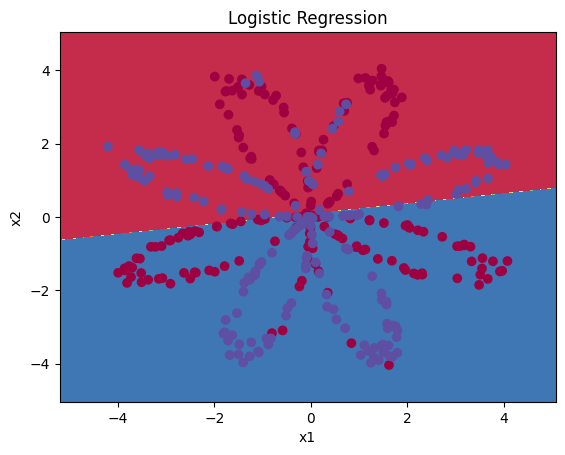

In [47]:
# Train the logistic regression classifier
clf = LogisticRegressionCV()
clf.fit(X, y.reshape(-1))

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X)
accuracy = (np.dot(y.reshape(-1), LR_predictions) + np.dot((1-y.reshape(-1)), (1-LR_predictions))) / float(y.shape[0])
print (f"Logistic Regression Accuracy: {accuracy*100}%")

> The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

## 2 - Neural Network model

Logistic regression did not work well on the "flower dataset". Let's build a two-layer neural network model to tackle this problem.

Please refer to following general workflow to build such a neural network:
1. Determine number of neurons in the hidden layer. 
2. Initialize the neural networks parameters, include:
    - weights and biases connect inputs to hidden layer
    - weights and bias connect hiddent layer to output layer.
3. Implement forward propagation to make predictions
4. Compute loss between predictions and groundtruths
5. Implement backward propagation to calculate the gradients
6. Update parameters (weights and biases) using gradient descent algorithm

### 2.1 - Initialization
Parameters determine the accurcy of the classifier. Before we can use gradient descent to approach the optimal values, let's first initialize them to values close to 0. 

**(10%) Exercise 2.1: Initialize neural network parameters**

Complete function `init_params()` to initialize parameters based on the dimension of input data and the hidden layer size. The output of this function will be a dictionary storing all these parameters. 

- You can initialize all the bias terms with 0.
- Hint: to create an array with small values, consider use something like `np.random.randn(a,b) * 0.01` 
- Please refer to the 6th [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the dimensions of the parameters. 

In [48]:
def init_params(dim_input, dim_layer):
    """
    Argument:
        dim_input -- input feature dimension, N
        dim_layer -- hidden layer dimension, L
    
    Returns:
        params -- python dictionary containing your parameters:
            W1 -- 1st layer weight matrix of shape (L, N)
            b1 -- 1st layer bias vector of shape (1, L)
            w2 -- 2nd layer weight vector of shape (1, L)
            b2 -- 2nd layer bias vector of shape (1, 1)
    """
        
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(dim_layer, dim_input)*0.01
    b1 = np.random.randn(1, dim_layer)*0.00  # np.zeros((1, L))
    w2 = np.random.randn(1, dim_layer)*0.01
    b2 = np.random.randn(1, 1)*0.00  # np.zeros((1, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (dim_layer, dim_input))
    assert (b1.shape == (1, dim_layer))
    assert (w2.shape == (1, dim_layer))
    assert (b2.shape == (1, 1))
    
    params = {
        'W1': W1,
        'b1': b1,
        'w2': w2,
        'b2': b2
    }
    
    return params


# test
np.random.seed(1) # set a seed so that the results are consistent
N, L = 2, 4

parameters = init_params(N, L)
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"w2 = {parameters['w2']}")
print(f"b2 = {parameters['b2']}")

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207]]
b1 = [[ 0. -0.  0. -0.]]
w2 = [[-0.00322417 -0.00384054  0.01133769 -0.01099891]]
b2 = [[-0.]]


**Expected Output**:
>
```console
W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207]]
b1 = [[ 0. -0.  0. -0.]]
w2 = [[-0.00322417 -0.00384054  0.01133769 -0.01099891]]
b2 = [[-0.]]
```


### 2.2 - Forward Propagation
With parameters, we are able to make predictions. We'll use the predictions (random guesses at this moment) to compute losses and cost later.

**(20%) Exercise 2.2: Forward propagation**

Complete function `forward()` to compute predictions and intermediate results in the forward propagation. Feed data matrix, `X` and parameter dictionary, `params` to predict probabilities of the classes, `yhat`.
- Use hyperbolic tangent function to compute values of neurons in the hidden layer, `X1` . This function comes with NumPy library.
- Use sigmoid function to compute the predictions. You are welcome to use the imported `sigmoid()` function.
- Store intermediate results in "`cache` dictionary. `cache` will be given as an input to the backpropagation function.
- Refer to the 7th [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the mathematical representation of forward propagation.
- Refer to the 6th [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the shapes of the arrays.


In [49]:
def forward(X, params):
    """
    Argument:
        X -- data matrix of size (M, N)
        params -- dictionary containing the parameters
    
    Returns:
        yhat -- The sigmoid output of the second activation
        cache -- a dictionary containing intermediate results:
            Z1 -- hidden layer, a matrix before activation, (M, L)
            X1 -- hidden layer, a matrix after activation, (M, L)
            z2 -- output layer, a vector before activation (M, 1)
            yhat -- output layer, a vector after activation, (M, 1)
    """
    ### START CODE HERE ### (≈ 8 lines of code)
    # Retrieve each parameter from the dictionary "params"
    W1 = params['W1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']
    # Implement Forward Propagation to calculate yhat (probabilities)
    Z1 = np.dot(X, W1.T) + b1
    X1 = np.tanh(Z1)
    z2 = np.dot(X1, w2.T) + b2
    yhat = sigmoid(z2)
    ### END CODE HERE ###
        
    assert(yhat.shape == (X.shape[0], 1))
    
    cache = {
        'Z1': Z1,
        'X1': X1,
        'z2': z2,
        'yhat': yhat,
    }
    
    return yhat, cache


# test
np.random.seed(1) # set a seed so that the results are consistent
X_assess = np.random.randn(3, 2)
parameters = {
    'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
    'w2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': np.random.randn(1, 4),
    'b2': np.array([[-1.3]])
}

yhat, cache = forward(X_assess, parameters)
print(f"Z1 = {cache['Z1']}")
print(f"X1 = {cache['X1']}")
print(f"z2 = {cache['z2']}")
print(f"yhat = {cache['yhat']}")

Z1 = [[ 1.73838639 -0.80594056  0.29505694 -0.23358372]
 [ 1.74761669 -0.76752371  0.3375432  -0.2386649 ]
 [ 1.74250012 -0.81744518  0.3228917  -0.21635762]]
X1 = [[ 0.94003922 -0.66734479  0.28678255 -0.22942622]
 [ 0.94110368 -0.64548722  0.3252823  -0.2342343 ]
 [ 0.94051591 -0.67367693  0.31211926 -0.21304371]]
z2 = [[-1.3075564 ]
 [-1.30766425]
 [-1.30698864]]
yhat = [[0.21289603]
 [0.21287796]
 [0.21299119]]


**Expected Output**:
>
```console
Z1 = [[ 1.73838639 -0.80594056  0.29505694 -0.23358372]
 [ 1.74761669 -0.76752371  0.3375432  -0.2386649 ]
 [ 1.74250012 -0.81744518  0.3228917  -0.21635762]]
X1 = [[ 0.94003922 -0.66734479  0.28678255 -0.22942622]
 [ 0.94110368 -0.64548722  0.3252823  -0.2342343 ]
 [ 0.94051591 -0.67367693  0.31211926 -0.21304371]]
z2 = [[-1.3075564 ]
 [-1.30766425]
 [-1.30698864]]
yhat = [[0.21289603]
 [0.21287796]
 [0.21299119]]
 ```

### 2.3 - Compute Cost
With parameters, we are able to make predictions. We'll use the predictions (random guesses at this moment) to compute losses and cost later.

**(5%) Exercise 2.3: Compute Cost**

Complete function `compute_cost()` to compute the costs caused by wrong prediction. Feed prediction, `yhat` and groundtruth, `y` to obtain `cost`.
- Refer to the 7th [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the mathematical representation of forward propagation.


In [50]:
def compute_cost(yhat, y):
    """    
    Arguments:
        yhat -- predict probabilies, vector of shape (M, 1)
        y -- "true" labels, vector of shape (M, 1)
    
    Returns:
        cost -- cross-entropy cost
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    M = y.shape[0]
    losses = -np.multiply(y, np.log(yhat)) - np.multiply(1-y, np.log(1 - yhat))
    cost = (1/M)*np.sum(losses)
    #cost = np.mean(losses, axis = 0)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)  # get rid of unwanted dimensions
    #assert(isinstance(cost, float))
    
    return cost


# test
np.random.seed(1)
y_assess = (np.random.randn(3, 1) > 0)
yhat_assess = np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]).T
print(f"cost = {compute_cost(yhat_assess, y_assess)}")

cost = 0.6930587610394646


**Expected Output**:
>
```console
cost = 0.6930587610394646
```

### 2.4 - Backward Propagation
Compute gradients of the neural network's parameters in order to update them based on the directions that could decrease the cost later.

**(30%) Exercise 2.4: Compute gradients**

Complete function `grad()` to compute the gradients of the cost w.r.t. parameters. Feed parameters, `params`, intermediate results computed in forward propagation, `cache`, data, `X`, true labels, `y` to compute parameters' gradients, `grads`.
- Refer to the last [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the mathematical representation of backward propagation.
- Refer to the 9th [slide](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0914/nn_p1.pdf) for the mathematical representation of derivative of `tanh` function.

In [51]:
def grad(params, cache, X, y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
        params -- python dictionary containing nn parameters 
        cache -- a dictionary containing 'Z1', 'X1', 'z2' and 'yhat'
        X -- input data of shape (M, 2)
        y -- "true" labels vector of shape (M, 1)
    
    Returns:
        grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[0]
    #print("m: ", m)
    
    ### START CODE HERE ### (≈ 10 lines of code)
    # Retrieve W1 and w2 from the dictionary "params".
    W1 = params['W1']
    w2 = params['w2']        
    # Retrieve also X1 and yaht from dictionary "cache".
    X1 = cache['X1']
    yhat = cache['yhat']
    # Calculate the derivative of the sigmoid function
    tanhZ = 1 - np.square(np.tanh(cache["Z1"]))
    # Backward propagation: calculate dW1, db1, dw2, db2. 
    dz2 = yhat - y
    dw2 = (1/m) * np.dot(dz2.T , X1)
    db2 = (1/m) * np.sum(dz2.T, axis = 1)
    dX1 = np.dot(dz2, w2) # not dz2.T
    dZ1 = np.multiply(dX1, tanhZ) # uses tanh activation function, not sigmoid
    dW1 = (1/m) * np.dot(dZ1.T, X)
    db1 = (1/m) * np.sum(dZ1, axis = 0)
    ### END CODE HERE ###
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dw2': dw2,
             'db2': db2}
    
    return grads


# test
np.random.seed(1)
X_assess = np.random.randn(3, 2)
y_assess = (np.random.randn(3, 1) > 0)
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
    [-0.02136196,  0.01640271],
    [-0.01793436, -0.00841747],
    [ 0.00502881, -0.01245288]]),
    'w2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': np.zeros((1, 4)),
    'b2': np.array([[ 0.]])}

cache = {'X1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
        [-0.05225116,  0.02725659, -0.02646251],
        [-0.02009721,  0.0036869 ,  0.02883756],
        [ 0.02152675, -0.01385234,  0.02599885]]).T,
'yhat': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]).T,
'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
        [-0.05229879,  0.02726335, -0.02646869],
        [-0.02009991,  0.00368692,  0.02884556],
        [ 0.02153007, -0.01385322,  0.02600471]]).T,
'z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]]).T}

grads = grad(parameters, cache, X_assess, y_assess)
print (f"dW1 = {grads['dW1']}")
print (f"db1 = {grads['db1']}")
print (f"dw2 = {grads['dw2']}")
print (f"db2 = {grads['db2']}")

dW1 = [[ 0.00531892 -0.00324297]
 [ 0.00456198 -0.00278272]
 [-0.00277127  0.00168846]
 [-0.011519    0.00702032]]
db1 = [ 0.00176201  0.00150995 -0.00091736 -0.00381422]
dw2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [-0.16655712]


**Expected output**:
>
```console
dW1 = [[ 0.00531892 -0.00324297]
 [ 0.00456198 -0.00278272]
 [-0.00277127  0.00168846]
 [-0.011519    0.00702032]]
db1 = [[ 0.00176201  0.00150995 -0.00091736 -0.00381422]]
dw2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
```

### 2.5 - Gradient Descent
Now, we can perform gradient descent algorithm to reduce cost iteratively.

**(10%) Exerise 2.5: Update parameters**

Complete `update_params()` function to perform gradient descent update on the parameters. Feed in `(dW1, db1, dw2, db2)` in `grads` in order to update `(W1, b1, w2, b2)` in `params`.
- General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [52]:
from operator import le


def update_params(params, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent
    
    Arguments:
        params -- python dictionary containing trainable parameters 
        grads -- python dictionary containing gradients 
    
    Returns:
        params -- python dictionary containing updated parameters 
    """
    ### START CODE HERE ### (≈ 12 lines of code)
    # Retrieve each parameter from the dictionary "params"
    W1 = params['W1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    params = {
        'W1': W1,
        'b1': b1,
        'w2': w2,
        'b2': b2
    }
    
    return params


# test
parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
    [-0.02311792,  0.03137121],
    [-0.0169217 , -0.01752545],
    [ 0.00935436, -0.05018221]]),
'w2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
'b1': np.array([[ -8.97523455e-07],
    [  8.15562092e-06],
    [  6.04810633e-07],
    [ -2.54560700e-06]]).T,
'b2': np.array([[  9.14954378e-05]])}

grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
    [ 0.00082222, -0.00700776],
    [-0.00031831,  0.0028636 ],
    [-0.00092857,  0.00809933]]),
'dw2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
        -2.55715317e-03]]),
'db1': np.array([[  1.05570087e-07],
    [ -3.81814487e-06],
    [ -1.90155145e-07],
    [  5.46467802e-07]]).T,
'db2': np.array([[ -1.08923140e-05]])}

parameters = update_params(parameters, grads)
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"w2 = {parameters['w2']}")
print(f"b2 = {parameters['b2']}")

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06  1.27373948e-05  8.32996807e-07 -3.20136836e-06]]
w2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:
>
```console
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06  1.27373948e-05  8.32996807e-07 -3.20136836e-06]]
w2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
```

### 2.6 - Integration

We have prepared all the building blocks for a neural network. Let's put them together now.

**(10%) Exercise 2.6: Train neural network** 

Train a two-layer (single hidden layer) neural network by put previously built functions in order. Complete `nn_model()` function. Feed Data (`X`), true labels (`y`) and hidden layer size (`dim_layer`) to the function. Output updated parameters (`params`) after `num_iterations` of updates.

In [53]:
def nn_model(X, y, dim_layer, num_iterations=10000, print_cost=False):
    """
    Arguments:
        X -- data matrix
        y -- ground truth labels
        dim_layer -- hidden layer size
        num_iterations -- Number of iterations in gradient descent loop
        print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
        params -- updated parameters
    """
    
    np.random.seed(3)
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    params = init_params(X.shape[1], dim_layer)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation.
        yhat, cache = forward(X, params) 
        # Compute cost.
        cost = compute_cost(yhat, y)
        # Backpropagation (Compute gradients)
        grads = grad(params, cache, X, y)
        # Gradient descent parameter update
        params = update_params(params, grads)
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and not i % 1000:
            print (f"Cost after iteration {i}: {cost}")

    return params


# test 
np.random.seed(1)
X_assess = np.random.randn(3, 2)
Y_assess = (np.random.randn(3, 1) > 0)

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"W2 = {parameters['w2']}")
print(f"b2 = {parameters['b2']}")

Cost after iteration 0: 0.6929800483756152
Cost after iteration 1000: 0.00032885618152790836
Cost after iteration 2000: 0.0001552957339964422
Cost after iteration 3000: 0.00010051562777308019
Cost after iteration 4000: 7.392591476501621e-05
Cost after iteration 5000: 5.8290456100744886e-05
Cost after iteration 6000: 4.802352473400242e-05
Cost after iteration 7000: 4.0777969140593744e-05
Cost after iteration 8000: 3.539782456686212e-05
Cost after iteration 9000: 3.1248690422728994e-05
W1 = [[ 2.39484555 -0.25752355]
 [ 2.42773549 -0.26651015]
 [-0.536067    0.10188337]
 [-1.35935834  0.14489249]]
b1 = [[-0.8024035  -0.82340705  0.09423512  0.40945937]]
W2 = [[ 4.48282085  4.61820705 -0.58866038 -1.78642279]]
b2 = [[0.08248502]]


**Expected Output**:
>
```console
Cost after iteration 0: 0.692980
Cost after iteration 1000: 0.000329
Cost after iteration 2000: 0.000155
Cost after iteration 3000: 0.000101
Cost after iteration 4000: 0.000074
Cost after iteration 5000: 0.000058
Cost after iteration 6000: 0.000048
Cost after iteration 7000: 0.000041
Cost after iteration 8000: 0.000035
Cost after iteration 9000: 0.000031
W1 = [[ 2.39484555 -0.25752355]
 [ 2.42773549 -0.26651015]
 [-0.536067    0.10188337]
 [-1.35935834  0.14489249]]
b1 = [[-0.8024035  -0.82340705  0.09423512  0.40945937]]
W2 = [[ 4.48282085  4.61820705 -0.58866038 -1.78642279]]
b2 = [[0.08248502]]
```

### 2.7 Predictions

Now, you can use the updated parameters to classify any point in the plane. 

**(5%) Exercise 2.7: Classification**

Complete `predict()` function to enable classification. A prediction needs to be an integer either 0 or 1 to represent the class. 
- Use 0.5 as the threshold.

In [54]:
def predict(params, X):
    """
    Given parameters, classify any datapoints
    
    Arguments:
        params -- python dictionary containing nn parameters 
        X -- datapoints need to be classified
    
    Returns
        pred -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    # Computes class probabilities using forward propagation
    yhat, cache = forward(X, params)
    # Classifies to 0/1 using 0.5 as the threshold.
    pred = np.round(yhat)
    ### END CODE HERE ###
    
    return pred


# test
np.random.seed(0)
X_assess = np.random.randn(3, 2)
parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
    [-0.02311792,  0.03137121],
    [-0.0169217 , -0.01752545],
    [ 0.00935436, -0.05018221]]),
    'w2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
    'b1': np.array([[ -8.97523455e-07],
    [  8.15562092e-06],
    [  6.04810633e-07],
    [ -2.54560700e-06]]).T,
    'b2': np.array([[  9.14954378e-05]])}

predictions = predict(parameters, X_assess)
print(f"predictions mean = {np.mean(predictions)}")

predictions mean = 0.6666666666666666


**Expected Output**: 
>
```console
predictions mean = 0.6666666666666666
```

## 3 - Model Deploy

It is time to run the neural network model and see how it performs on this planar dataset. Run the following code to test your model with a single hidden layer of 4 neurons.

Cost after iteration 0: 0.6930928851053969
Cost after iteration 1000: 0.2844852924337877
Cost after iteration 2000: 0.2691121408361607
Cost after iteration 3000: 0.26204655333252974
Cost after iteration 4000: 0.2574590704841595
Cost after iteration 5000: 0.254298035937094
Cost after iteration 6000: 0.2520130574747028
Cost after iteration 7000: 0.25029610576983485
Cost after iteration 8000: 0.2489649619459887
Cost after iteration 9000: 0.24790590441692753
Accuracy: 91.25%


Text(0.5, 1.0, 'Neural Network')

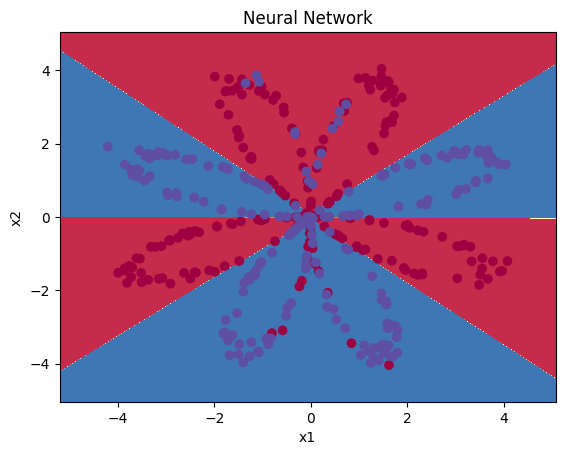

In [55]:
# Build an nn model
params = nn_model(X, y, dim_layer=4, num_iterations=10000, print_cost=True)

# Print accuracy
preds = predict(params, X)
print(f"Accuracy: {np.squeeze((np.dot(y.T, preds) + np.dot((1-y.T), (1-preds))) / y.size * 100)}%")

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(params, x), X, y)
plt.title("Neural Network")

**Expected Output**:
>
```console
Cost after iteration 0: 0.6930928851053969
Cost after iteration 1000: 0.2844852924337878
Cost after iteration 2000: 0.26911214083616064
Cost after iteration 3000: 0.26204655333252974
Cost after iteration 4000: 0.2574590704841595
Cost after iteration 5000: 0.2542980359370941
Cost after iteration 6000: 0.25201305747470276
Cost after iteration 7000: 0.25029610576983485
Cost after iteration 8000: 0.2489649619459887
Cost after iteration 9000: 0.24790590441692756
Accuracy: 91.25%
```

Accuracy is largely improved compared to Logistic Regression. This result suggests that neural network model is more expressive than logistic regression model. 
Run the following code to find out how hidden layer size may affect the decision making. It may take several min minutes depending on hidden layer size. You will observe different behaviors of the model for various hidden layer sizes.

Accuracy for 1 hidden units: 67.5%
Accuracy for 2 hidden units: 67.25%
Accuracy for 4 hidden units: 90.75%
Accuracy for 8 hidden units: 91.25%
Accuracy for 16 hidden units: 90.25%
Accuracy for 32 hidden units: 90.75%
Accuracy for 64 hidden units: 90.75%
Accuracy for 128 hidden units: 90.25%


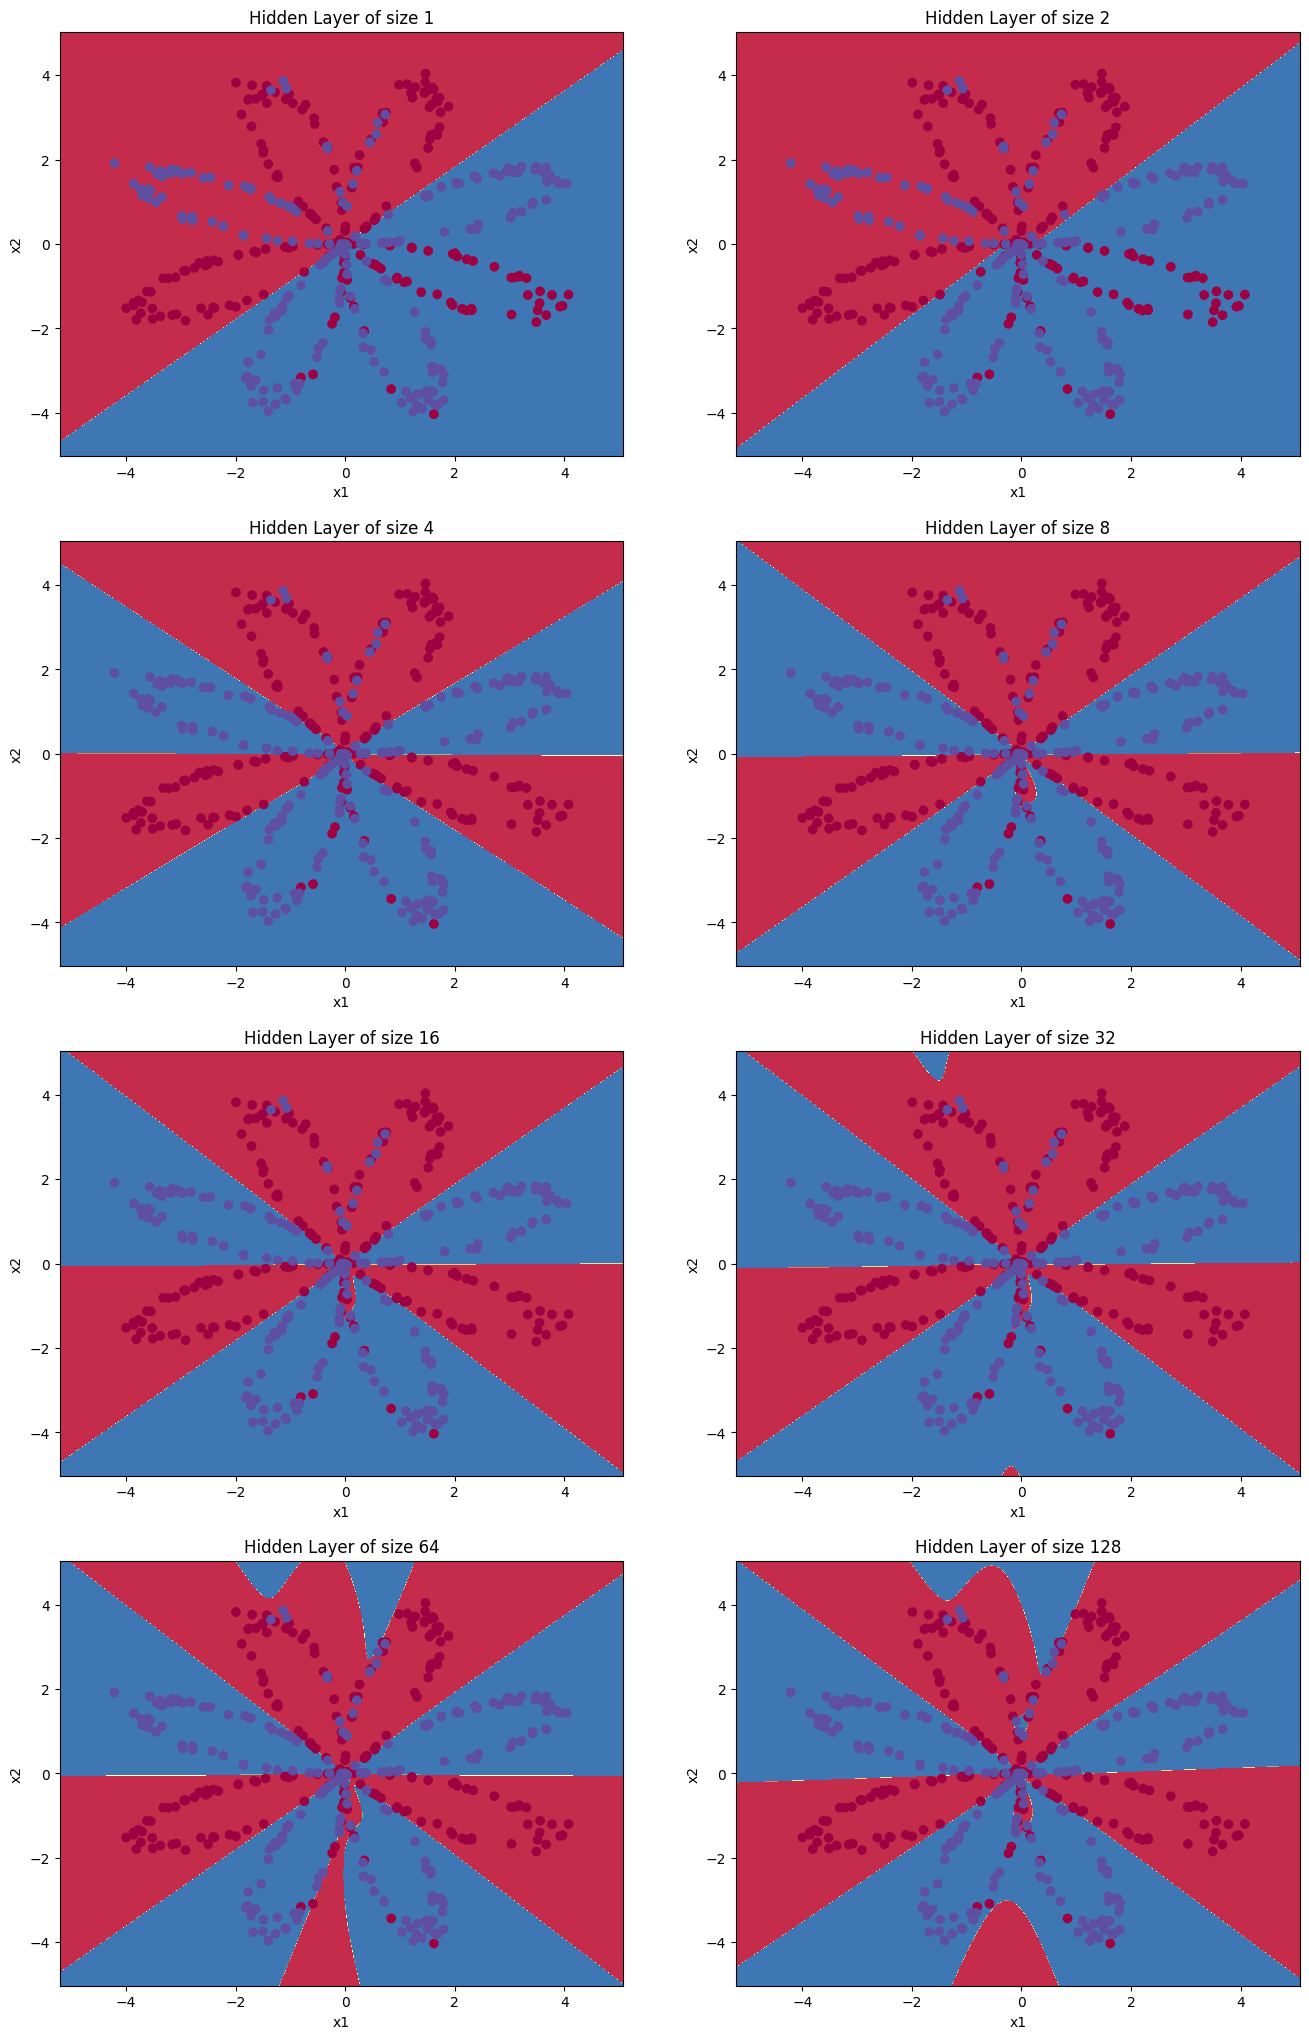

In [56]:
### FEEL FREE TO MODIFY LINE BELOW ###
hidden_layer_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
### FEEL FREE TO MODIFY LINE ABOVE ###

plt.figure(figsize=(16, 32))
for i, L in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % L)
    params = nn_model(X, y, L, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(params, x), X, y)
    preds = predict(params, X)
    accuracy = np.squeeze((np.dot(y.T, preds) + np.dot((1-y.T), (1-preds))) / y.size * 100)
    print (f"Accuracy for {L} hidden units: {accuracy}%")

## 4 - Train More Neural Networks

**(5%) Exercise 4: Train neural networks on new datasets**

You can train more neural network models using different datasets. Complete the required coding section below and observe the new classifiers.

x shape:  (200, 2)
y shape:  (200, 1)
Accuracy for 4 hidden units: 97.0%


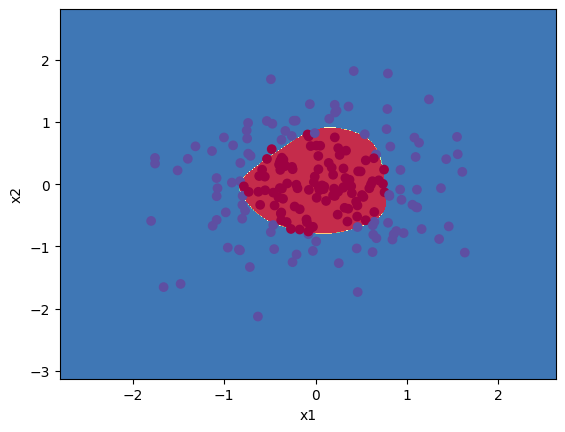

In [57]:
# Load new dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}
### CHANGE `dname` BELOW TO CHOOSE YOUR DATASET ###
dname = "gaussian_quantiles"
### CHANGE `dname` ABOVE TO CHOOSE YOUR DATASET ###
X, y = datasets[dname]
y = y%2
y = y.reshape((-1, 1))  # preprocess
print("x shape: ", X.shape)
print("y shape: ", y.shape)

### START CODE HERE ### (~ 1 lines of code)
params = nn_model(X, y, dim_layer=4, num_iterations=10000)
### END CODE HERE ###

preds = predict(params, X)
accuracy = np.squeeze((np.dot(y.T, preds) + np.dot((1-y.T), (1-preds))) / y.size * 100)
print (f"Accuracy for {4} hidden units: {accuracy}%")
plot_decision_boundary(lambda x: predict(params, x), X, y)


# Congrats on finishing this Assignment!